In [15]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size':12}) 

In [16]:
from myst_nb import glue


# Plotting data

## Overview

```{admonition} Questions
:class: questions
- How do I read data from a file?
- What have pandas got to do with this?
```

```{admonition} Objectives
:class: objectives
- Read in some data
- Make a **good** plot
```

## Reading in data with `pandas`

The next new package we're going to be looking at today is called `pandas`. We'll cover `pandas` in more detail in the next session; today we're just going to use it to read in our data file.

Download the [C2_Ohms_Fitting.csv](./data/C2_Ohms_Fitting.csv) file linked here and save it in the `data` folder you created at the start.

```{admonition} **Warning: Do not** open this file in Excel!
:class: danger
Do not double click it to open it. We'll be reading it in to python in a moment. 
```

You may have spotted that this file does not have `.xlsx` at the end of its name, rather it has `.csv`. This indicates that it contains **comma-separated values**. These files can still be read by Excel, but you could also just open them in a text editor and read what's inside. You can save your own data as a `csv` file in Excel by selecting it in the File Format menu in the "Save as..." dialogue box.

Once you have the file saved in the right place, you can read it in with `pandas`.

The first thing to do is to import the `pandas` library. It's common practice to import it using its short name, `pd`.

In [17]:
import pandas as pd

We can then read in the file using the `pd.read_csv` function. The data we're working with here is quite simple, so all we need to pass to `read_csv` is the location of the file we want to read in. We also want to assign the output of `read_csv` to a variable. In this case we'll call the variable `data`.

In [18]:
data = pd.read_csv('./data/C2_Ohms_Fitting.csv')

In the command above you'll see we've not just given the filename to `read_csv`, but we've given the location of the file too. This is called the **path**. The path can be broken down as follows:

- `./`  means "start from the folder I'm currently in"
- `data/` is the name of our data folder
- `C2_Ohms_Fitting.csv` is the name of our data file.

This is one of the reasons why I had you create a single folder to keep your work in, and a single folder inside that to store your data. It makes your life much simpler when all your data is stored in one place!

We can look at what's stored in the `data` variable in the same way we'd look at any other variable. Just type it's name!

In [19]:
data

,V,I_mA,I_unc_mA
0,0.0,0,10
1,0.5,10,10
2,1.0,20,10
3,1.5,20,10
4,2.0,20,10
5,2.5,30,10
6,3.0,40,10
7,3.5,30,10
8,4.0,40,10
9,4.5,40,10


Run

```python
type(data)
```
in a new cell to see what kind of variable is stored in `data`. Is it what you were expecting?

If you've run everything up to now correctly you should see that ```type(data)``` returns a type we haven't come across before. It returns `pandas.core.frame.DataFrame`.

This is a `DataFrame` object. These work very similarly to `numpy` arrays, and we can index and slice them in the same way. In the next session we'll be doing lots of fancy things with DataFrames, but today we'll stick to the basics. 

`data` contains voltage in volts, current in milliamps, and the uncertainty on the current (also in milliamps). 

We're now going to make a plot of the $V$ and $I$ data stored in `data`. Rather than write everything from scratch, we'll start from the simple plot code we had above, and edit that. 

But how do we get at the data we want to plot? We just slice our dataframe, but this time we can use the column name to say what we want. To get the `V` column we use

In [20]:
data['V']

0      0.0
1      0.5
2      1.0
3      1.5
4      2.0
5      2.5
6      3.0
7      3.5
8      4.0
9      4.5
10     5.0
11     5.5
12     6.0
13     6.5
14     7.0
15     7.5
16     8.0
17     8.5
18     9.0
19     9.5
20    10.0
Name: V, dtype: float64

````{admonition} Exercise: Columns
:class: practice

You can check the names of the columns in your dataframe by looking at the `columns` attribute of your dataframe. 

Use 

```python
data.columns
```

to check what the column names are. Once you have them, slice your dataframe to get the current column. 
````

We can now reuse our plotting code from above to plot the $V$ and $I$ data, substituting in `data['V']` for the $x$ value and the `I_mA` column for the $y$ value.

## What makes a good scientific plot?

Any plot you make should be clear and informative. There are several things that you **always** need on a plot of your results:
* Error bars
* Axis labels
* Units

We can do this pretty easily with `plt`. First we call `errorbar` to plot our points and errorbars.

```python
ax.errorbar(data['V'],           
             data['I_mA'],              
             yerr=data['I_unc_mA'],     
             marker='o',             
             markersize = 7,        
             color='black',          
             linestyle='none',       
             capsize=6,              
             )
```

Here were're calling `errorbar`, telling it which column corresponds to the y-axis uncertainties and the size and shape, and colour of our points. `linestyle='none'` is telling it **not** to draw a line joining up all our points. `capsize` sets the size the end bars on the errorbars.
This command looks pretty long, but we'll look later at how to set some parameters as defaults.

Finally, we add the axis labels **including the units** using `ax.set_xlabel` and `ax.set_ylabel` so our plot actually means something. 


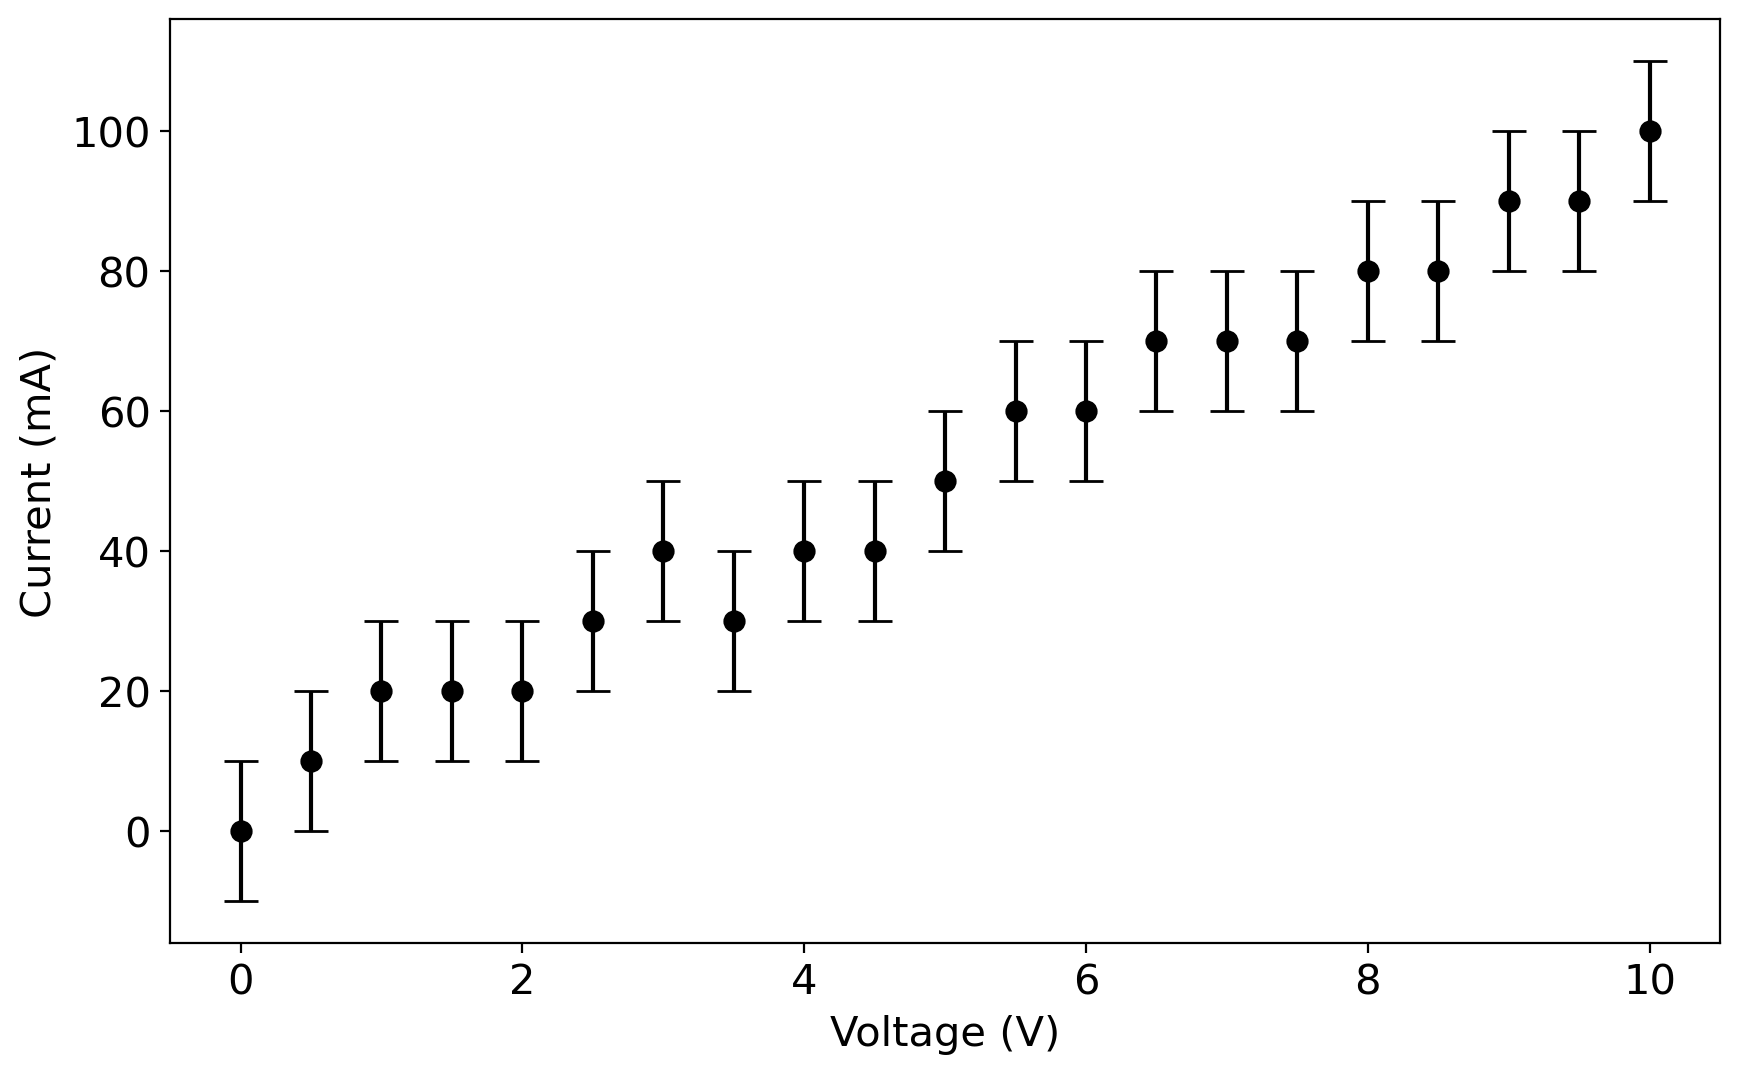

In [21]:
fig_g = plt.figure(figsize=(10,6))
ax = fig_g.add_subplot(1,1,1)
ax.errorbar(data['V'], 
            data['I_mA'],           
            yerr=data['I_unc_mA'],     
            marker='o',             
            markersize = 7,
            markerfacecolor = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,              
            )
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (mA)')

#plt.show()
glue("first_fig", fig_g, display=False)


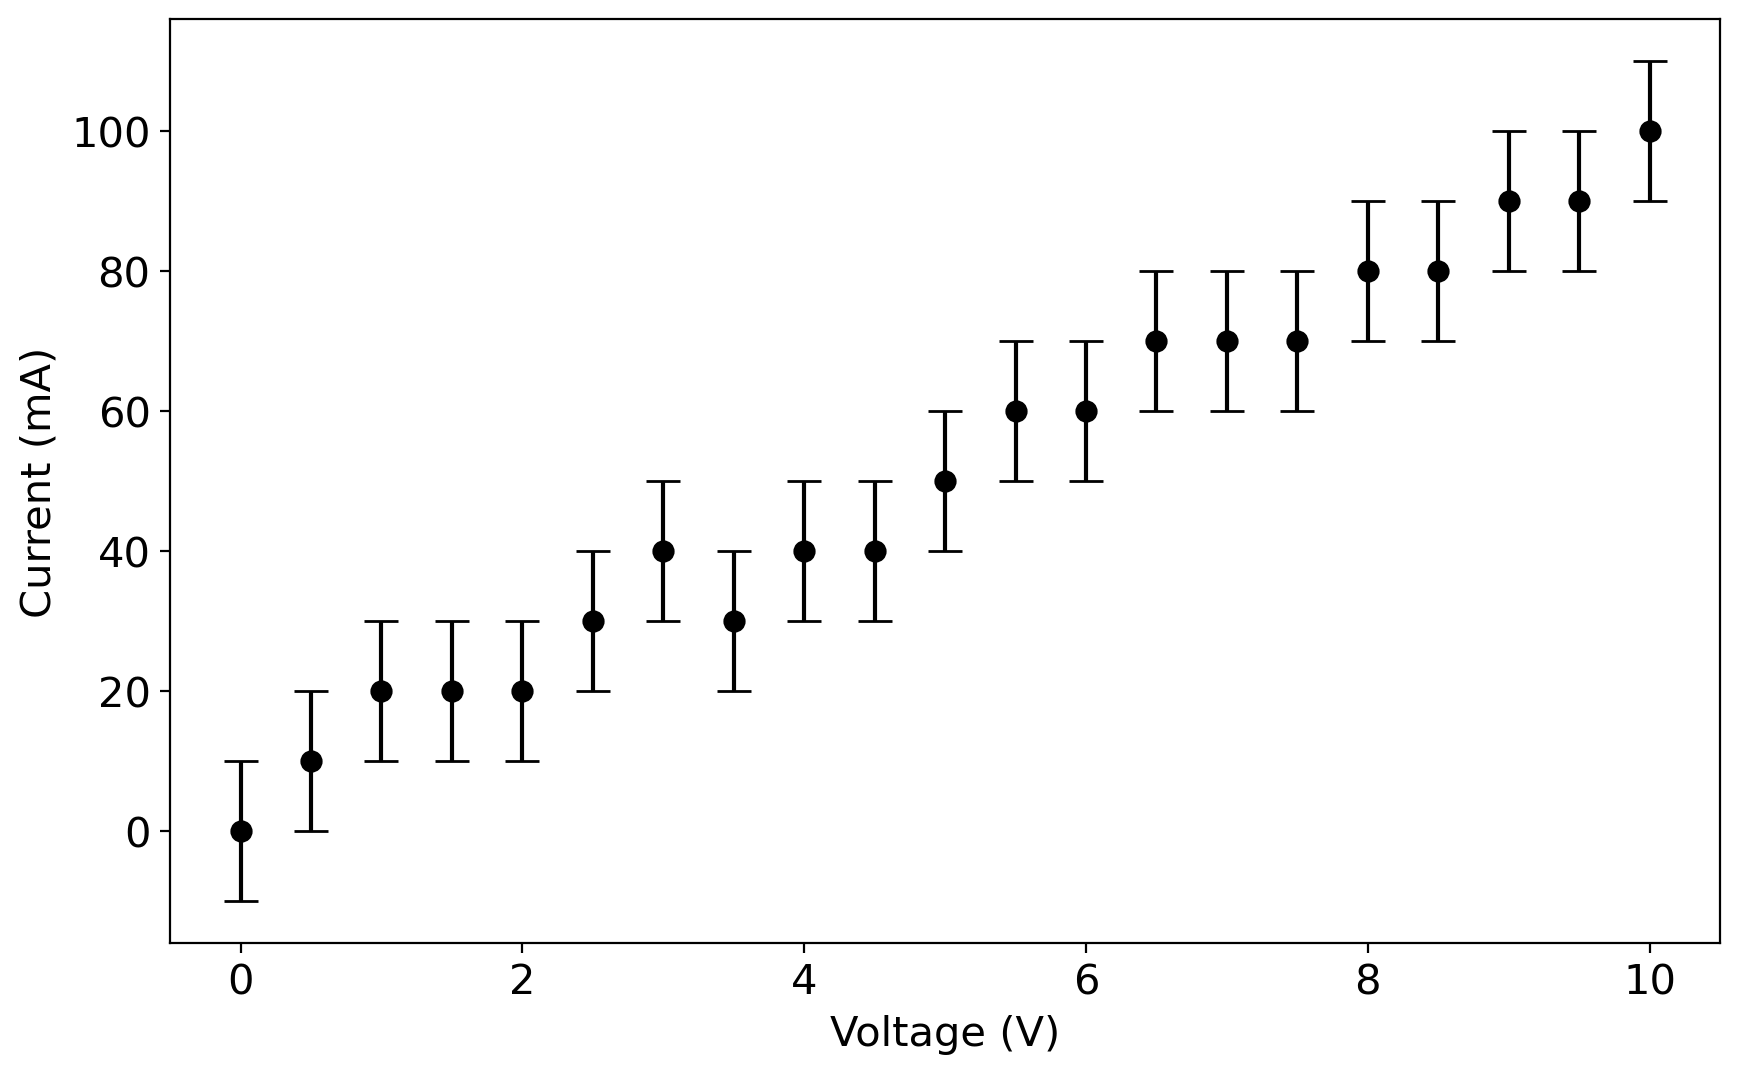

In [22]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data['V'], 
            data['I_mA'],           
            yerr=data['I_unc_mA'],     
            marker='o',             
            markersize = 7,
            markerfacecolor = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,              
            )
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (mA)')

plt.show()

```{glue:figure} first_fig
:width: 800px
```

## Making it fancy

Now our plot is starting to look good! We can now add in some finishing touches

### Tick marks

We can change the tick marks on the axes to go into the graph rather than out towards the numbers. This makes the plot easier to read. 

### Font size

The font size should be big enough that it's easy to read when it's printed or included in your lab report.

To change the font size we use `plt.rcParams.update`. This changes the settings for all the text.

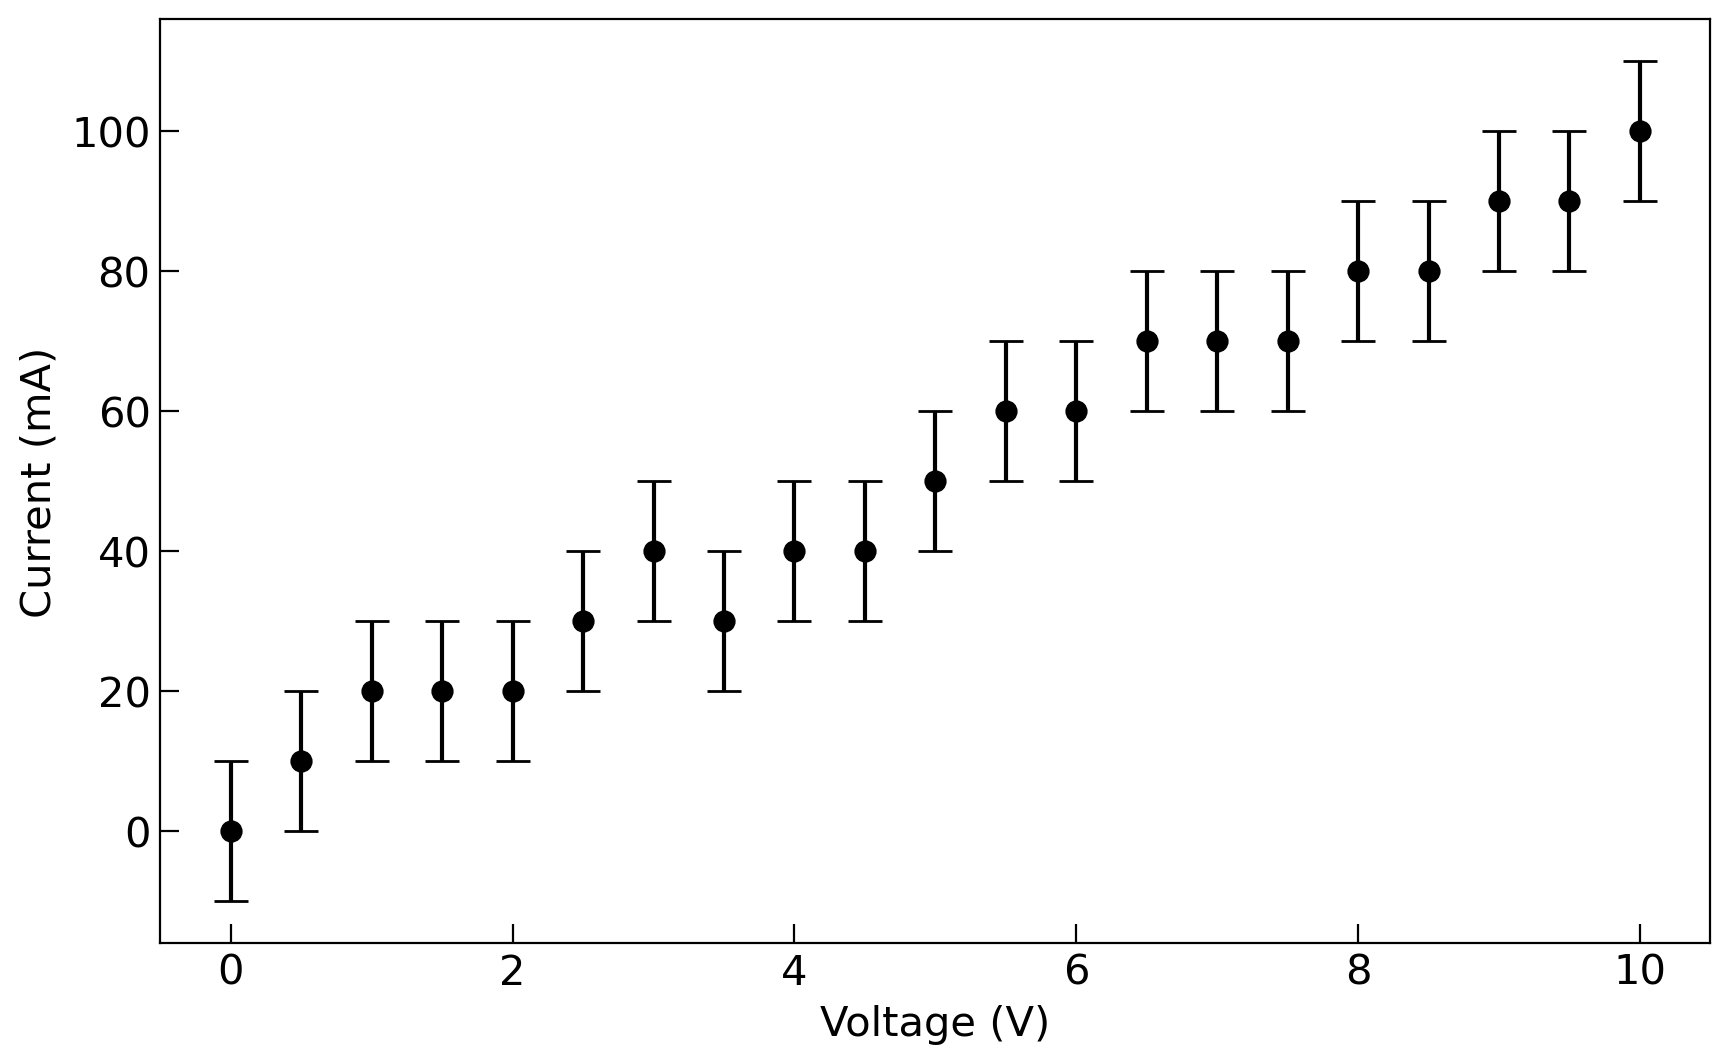

In [23]:
plt.rcParams.update({'font.size':15})  

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data['V'], 
            data['I_mA'],           
            yerr=data['I_unc_mA'],     
            marker='o',             
            markersize = 7,
            markerfacecolor = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,              
            )
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (mA)')

ax.tick_params(direction='in', length=7)

plt.show()

```{admonition} One figure = one cell:
:class: myinfo
All your `matplotlib` commands for a given plot should be in the same cell or you won't get anything out when you run `plt.show()`.
```

(ex-customise-plot)=
```{admonition} Exercise: Customise the plot
:class: practice
The plot above is informative, but it's not the prettiest.

Edit the parameters in the code above to change the following:

* Change the colour of the points
* Change the point (`marker`) shape and size

Information about how to change the colour and shape of the markers can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

[solution](soln_customise_plot.ipynb)

```

Once you have a plot you're happy with, remember to save your plot using `savefig()`

In [28]:
fig.savefig('pretty_plot.pdf')

## Key Points
* All plots should include:
  - Error bars
  - Axis labels
  - Units
* Save your plot using `savefig`
